In [1]:
import plotly.express as px
from ipywidgets import interact
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import utils
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse


pd.set_option('display.max_columns', None)

# Regression

I'll be working on both estimating the index value & the price per squarefoot given the index. 

I'll also be testing a number of scenarios with regression since my data is imbalanced by type and I expect general regression to be inaccurate due to a lack of detailed information about each property.

For price per squarefoot, I'll be experimenting with the general data set and a specific sub dataset for office.

In [2]:
cleaned_df = pd.read_csv('cleaned_second_commercial.csv', parse_dates = ['Date'])

## Time Seriese Regression

In [3]:
data = cleaned_df[['Date', 'idx_sqft_day']]
history = 90
future = 30

shifts = [x + future for x in range(1, history + 1)]

for shift in shifts:
  data['t-' + str(shift)] = data['idx_sqft_day'].shift(shift)

data = data.dropna()
data.head()

S:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Date  idx_sqft_day      t-31      t-32      t-33      t-34  \
120 1979-09-01      4.739873  5.172845  5.172845  5.172845  8.442958   
121 1979-09-01      4.739873  5.172845  5.172845  5.172845  5.172845   
122 1979-09-01      4.739873  5.172845  5.172845  5.172845  5.172845   
123 1979-09-01      4.739873  6.475605  5.172845  5.172845  5.172845   
124 1979-09-01      4.739873  6.475605  6.475605  5.172845  5.172845   

         t-35      t-36      t-37      t-38      t-39      t-40      t-41  \
120  8.442958  8.442958  8.442958  5.750766  5.750766  5.750766  5.750766   
121  8.442958  8.442958  8.442958  8.442958  5.750766  5.750766  5.750766   
122  5.172845  8.442958  8.442958  8.442958  8.442958  5.750766  5.750766   
123  5.172845  5.172845  8.442958  8.442958  8.442958  8.442958  5.750766   
124  5.172845  5.172845  5.172845  8.442958  8.442958  8.442958  8.442958   

         t-42      t-43      t-44      t-45       t-46       t-47       t-48  \
120  5.750766  2.894777  2.894777  1.086507  15.065427   1.732592   6.645401   
121  5.750766  5.750766  2.894777  2.894777   1.086507  15.065427   1.732592   
122  5.750766  5.750766  5.750766  2.894777   2.894777   1.086507  15.065427   
123  5.750766  5.750766  5.750766  5.750766   2.894777   2.894777   1.086507   
124  5.750766  5.750766  5.750766  5.750766   5.750766   2.894777   2.894777   

          t-49       t-50      t-51      t-52      t-53      t-54      t-55  \
120   1.996247   4.568321  4.568321  4.568321  4.568321  4.568321  4.568321   
121   6.645401   1.996247  4.568321  4.568321  4.568321  4.568321  4.568321   
122   1.732592   6.645401  1.996247  4.568321  4.568321  4.568321  4.568321   
123  15.065427   1.732592  6.645401  1.996247  4.568321  4.568321  4.568321   
124   1.086507  15.065427  1.732592  6.645401  1.996247  4.568321  4.568321   

         t-56      t-57      t-58      t-59      t-60      t-61       t-62  \
120  4.568321  4.568321  4.568321  4.568321  4.568321  2.477756  18.824610   
121  4.568321  4.568321  4.568321  4.568321  4.568321  4.568321   2.477756   
122  4.568321  4.568321  4.568321  4.568321  4.568321  4.568321   4.568321   
123  4.568321  4.568321  4.568321  4.568321  4.568321  4.568321   4.568321   
124  4.568321  4.568321  4.568321  4.568321  4.568321  4.568321   4.568321   

          t-63       t-64       t-65       t-66      t-67      t-68      t-69  \
120   3.636604   3.636604   3.636604   3.636604  3.636604  3.636604  3.636604   
121  18.824610   3.636604   3.636604   3.636604  3.636604  3.636604  3.636604   
122   2.477756  18.824610   3.636604   3.636604  3.636604  3.636604  3.636604   
123   4.568321   2.477756  18.824610   3.636604  3.636604  3.636604  3.636604   
124   4.568321   4.568321   2.477756  18.824610  3.636604  3.636604  3.636604   

         t-70      t-71      t-72      t-73      t-74      t-75      t-76  \
120  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604   
121  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604   
122  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604   
123  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604   
124  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604   

         t-77      t-78      t-79      t-80      t-81      t-82      t-83  \
120  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604   
121  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604   
122  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604   
123  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604   
124  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604  3.636604   

         t-84      t-85      t-86      t-87      t-88      t-89      t-90  \
120  3.636604  3.636604  3.636604  3.636604  1.276281  1.793503  3.463936   
121  3.636604  3.636604  3.636604  3.636604  3.636604  1.276281  1.793503   
122  3.636604  3.636604  3.636604  3.636604  

In [4]:
x = data.drop(columns=['Date', 'idx_sqft_day'])
y = data['idx_sqft_day']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

model = AdaBoostRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print('R-Squared:', r2_score(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))

R-Squared: -0.14607915738942512
Mean Absolute Error: 36.62189883689532
Root Mean Squared Error: 43.55068288606079


In [5]:
def iscatter(df, x, y, color=None, size=None, title=''):
    fig = px.scatter(df, x=x, y=y, color=color, size=size, 
                     title=title, template='none')
    
    fig.update_traces(marker_line_color='black', 
                  marker_line_width=1)

    fig.show()
    
results = pd.DataFrame([list(y_test), predictions], index=['idx_pcnt_change_day', 'predicted']).T
iscatter(results, 'idx_pcnt_change_day', 'predicted', title='idx vs. predicted')

### Weighted Moving Average

In [6]:
def wma(df, field, window):
    weights = np.arange(1, window + 1)
    ma = df[field].rolling(window)
    wma = ma.apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)
    return wma

In [7]:
data['183_day_wma'] = wma(data, 'idx_sqft_day', 183)
data['365_day_wma'] = wma(data, 'idx_sqft_day', 365)

data['183_day_vol'] = (wma(data, 'idx_sqft_day', 183)).std()
data['365_day_vol'] = (wma(data, 'idx_sqft_day', 365)).std()

data['t+5'] = data['idx_sqft_day'].shift(-5)

In [8]:
data = data.dropna()

In [9]:
data.tail()

Date  idx_sqft_day       t-31       t-32       t-33       t-34  \
2862 2019-12-30     17.764222   0.827514  32.904806   6.209637  21.256334   
2863 2020-01-03     49.193231   1.585987   0.827514  32.904806   6.209637   
2864 2020-01-06     37.714810  17.163993   1.585987   0.827514  32.904806   
2865 2020-01-07      5.668356   7.568189  17.163993   1.585987   0.827514   
2866 2020-01-29     49.787649   8.608815   7.568189  17.163993   1.585987   

           t-35       t-36       t-37       t-38       t-39        t-40  \
2862  76.522804  18.092416  35.463180  23.478588  61.550951  108.742932   
2863  21.256334  76.522804  18.092416  35.463180  23.478588   61.550951   
2864   6.209637  21.256334  76.522804  18.092416  35.463180   23.478588   
2865  32.904806   6.209637  21.256334  76.522804  18.092416   35.463180   
2866   0.827514  32.904806   6.209637  21.256334  76.522804   18.092416   

            t-41        t-42        t-43        t-44       t-45       t-46  \
2862   23.351477   23.351477   23.351477   26.135972  26.135972  26.135972   
2863  108.742932   23.351477   23.351477   23.351477  26.135972  26.135972   
2864   61.550951  108.742932   23.351477   23.351477  23.351477  26.135972   
2865   23.478588   61.550951  108.742932   23.351477  23.351477  23.351477   
2866   35.463180   23.478588   61.550951  108.742932  23.351477  23.351477   

           t-47       t-48       t-49       t-50       t-51       t-52  \
2862   3.966269   3.966269  18.513582  14.847087  22.956841  45.913682   
2863  26.135972   3.966269   3.966269  18.513582  14.847087  22.956841   
2864  26.135972  26.135972   3.966269   3.966269  18.513582  14.847087   
2865  26.135972  26.135972  26.135972   3.966269   3.966269  18.513582   
2866  23.351477  26.135972  26.135972  26.135972   3.966269   3.966269   

           t-53       t-54       t-55       t-56       t-57       t-58  \
2862  74.609734   6.387682  11.478421  14.546650  14.546650  14.757969   
2863  45.913682  74.609734   6.387682  11.478421  14.546650  14.546650   
2864  22.956841  45.913682  74.609734   6.387682  11.478421  14.546650   
2865  14.847087  22.956841  45.913682  74.609734   6.387682  11.478421   
2866  18.513582  14.847087  22.956841  45.913682  74.609734   6.387682   

           t-59       t-60        t-61        t-62        t-63        t-64  \
2862  10.918498   2.951594  152.089073    4.304408   77.785851  130.088766   
2863  14.757969  10.918498    2.951594  152.089073    4.304408   77.785851   
2864  14.546650  14.757969   10.918498    2.951594  152.089073    4.304408   
2865  14.546650  14.546650   14.757969   10.918498    2.951594  152.089073   
2866  11.478421  14.546650   14.546650   14.757969   10.918498    2.951594   

            t-65        t-66        t-67        t-68       t-69       t-70  \
2862   54.371466    0.605933    2.587508    7.441183  22.890106  21.109739   
2863  130.088766   54.371466    0.605933    2.587508   7.441183  22.890106   
2864   77.785851  130.088766   54.371466    0.605933   2.587508   7.441183   
2865    4.304408   77.785851  130.088766   54.371466   0.605933   2.587508   
2866  152.089073    4.304408   77.785851  130.088766  54.371466   0.605933   

            t-71        t-72        t-73        t-74        t-75       t-76  \
2862  122.559588   24.801772   24.801772   97.274751   71.435701   3.151083   
2863   21.109739  122.559588   24.801772   24.801772   97.274751  71.435701   
2864   22.890106   21.109739  122.559588   24.801772   24.801772  97.274751   
2865    7.441183   22.890106   21.109739  122.559588   24.801772  24.801772   
2866    2.587508    7.441183   22.890106   21.109739  122.559588  24.801772   

           t-77       t-78       t-79       t-80       t-81       t-82  \
2862  17.015070   1.478848  21.163338   9.981235  73.546917  29.358268   
2863   3.151083  17.015070   1.478848  21.163338   9.981235  73.546917   
2864  71.435701   3.151083  17.015070   1.478848  21.163338   9.981235   
2865  97.274751  71.435701   

In [10]:
x = data[['183_day_wma', '365_day_wma', '183_day_vol', '365_day_vol']]
y = data['t+5']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

model = RandomForestRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print('R-Squared:', r2_score(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))

R-Squared: -0.2799805899284624
Mean Absolute Error: 32.63483027896205
Root Mean Squared Error: 42.846136562656994


S:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [11]:
sorted(zip(model.feature_importances_, x.columns))

[(0.0, '183_day_vol'),
 (0.0, '365_day_vol'),
 (0.4768256054341129, '183_day_wma'),
 (0.523174394565887, '365_day_wma')]

In [12]:
model = AdaBoostRegressor()

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('R-Squared:', r2_score(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))

R-Squared: -1.5378807344550034
Mean Absolute Error: 52.9478842660469
Root Mean Squared Error: 60.3317024100865


In [13]:
data['183_day_ewm'] = data['idx_sqft_day'].ewm(alpha = 0.5, min_periods = 183).mean()
data['365_day_ewm'] = data['idx_sqft_day'].ewm(alpha = 0.5, min_periods = 365).mean()

data['183_day_ewm_vol'] = data['idx_sqft_day'].ewm(alpha = 0.5, min_periods = 183).std()
data['365_day_ewm_vol'] = data['idx_sqft_day'].ewm(alpha = 0.5, min_periods = 365).std()

In [14]:
data = data.dropna()

In [15]:
x = data[['183_day_ewm', '365_day_ewm', '183_day_ewm_vol', '365_day_ewm_vol']]
y = data['t+5']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

model = RandomForestRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print('R-Squared:', r2_score(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))

R-Squared: -0.2877767467608421
Mean Absolute Error: 31.35267555610929
Root Mean Squared Error: 43.34887282621105


S:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [16]:
sorted(zip(model.feature_importances_, x.columns))

[(0.2265832765024946, '183_day_ewm_vol'),
 (0.24608818838811528, '365_day_ewm_vol'),
 (0.25387026895118403, '183_day_ewm'),
 (0.273458266158206, '365_day_ewm')]

In [17]:
cleaned_df = cleaned_df.sort_values(by=['Date', 'Parcel'])
cleaned_df['30_idx_pct'] = cleaned_df['idx_sqft_day'].pct_change(30)
cleaned_df['idx_pct'] = cleaned_df['idx_sqft_day'].pct_change()

In [18]:
data1 = cleaned_df

In [19]:
data1['10_day_ewm'] = data1['idx_sqft_day'].ewm(alpha = 0.5, min_periods = 10).mean()
data1['90_day_ewm'] = data1['idx_sqft_day'].ewm(alpha = 0.5, min_periods = 90).mean()
data1['183_day_ewm'] = data1['idx_sqft_day'].ewm(alpha = 0.5, min_periods = 183).mean()
data1['365_day_ewm'] = data1['idx_sqft_day'].ewm(alpha = 0.5, min_periods = 365).mean()

data1['10_day_ewm_vol'] = data1['idx_sqft_day'].ewm(alpha = 0.5, min_periods = 10).std()
data1['90_day_ewm_vol'] = data1['idx_sqft_day'].ewm(alpha = 0.5, min_periods = 90).std()
data1['183_day_ewm_vol'] = data1['idx_sqft_day'].ewm(alpha = 0.5, min_periods = 183).std()
data1['365_day_ewm_vol'] = data1['idx_sqft_day'].ewm(alpha = 0.5, min_periods = 365).std()

data1['t+5'] = data1['idx_sqft_day'].shift(-5)
data1['t+30'] = data1['idx_sqft_day'].shift(-30)
data1['t+90'] = data1['idx_sqft_day'].shift(-90)
data1['t+183'] = data1['idx_sqft_day'].shift(-183)
data1['t+365'] = data1['idx_sqft_day'].shift(-365)

In [20]:
data1 = data1.dropna()

In [21]:
x = data1[['10_day_ewm', '90_day_ewm', '10_day_ewm_vol', '90_day_ewm_vol','183_day_ewm', '365_day_ewm', '183_day_ewm_vol', '365_day_ewm_vol'
           , 'idx_sqft_year', 'idx_sqft_month', 'Rent_index', 'fed_int_rate', 'idx_change_day',
          'idx_change_per_month', 'idx_change_per_year', '30_idx_pct', 'idx_pct']]
y = data1['t+5']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

model = RandomForestRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print('R-Squared:', r2_score(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))

R-Squared: -0.48418832483207175
Mean Absolute Error: 48.47528139001732
Root Mean Squared Error: 59.13720025583695


S:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [22]:
sorted(zip(model.feature_importances_, x.columns))

[(0.011694166276846798, 'idx_change_per_year'),
 (0.020659258567389635, '365_day_ewm_vol'),
 (0.022190609906653416, '10_day_ewm'),
 (0.02354895449796208, '90_day_ewm_vol'),
 (0.027790022741896615, '183_day_ewm_vol'),
 (0.03388237963503572, '365_day_ewm'),
 (0.037869337378177534, '90_day_ewm'),
 (0.04034776512855973, '10_day_ewm_vol'),
 (0.04774315186462598, '183_day_ewm'),
 (0.04832503786330109, 'idx_change_per_month'),
 (0.07577950270056262, 'Rent_index'),
 (0.07985913452339104, 'idx_change_day'),
 (0.09166360480020445, 'idx_sqft_year'),
 (0.09743895066855915, 'fed_int_rate'),
 (0.10660718033463767, '30_idx_pct'),
 (0.10842495569683182, 'idx_sqft_month'),
 (0.12617598741536468, 'idx_pct')]

## Final EDA before running supervised regression  on price per sqft

In [23]:
ml_df = cleaned_df.drop(columns = ['10_day_ewm','90_day_ewm','183_day_ewm','365_day_ewm','10_day_ewm_vol'
                           ,'90_day_ewm_vol','183_day_ewm_vol','365_day_ewm_vol','t+5', 't+5','t+30','t+90', 't+183', 't+365'])

In [24]:
ml_df.isna().mean().sort_values(ascending=False)*100

indv_pct_change           39.937326
indv_change_per_day       39.937326
days_btwn_sales           39.937326
idx_change_day            25.278552
idx_change_per_month       9.818942
Loc_Address                5.640669
idx_change_per_year        3.203343
30_idx_pct                 1.044568
Prop_Use_Desc              0.278552
idx_pct                    0.034819
Acres                      0.000000
Zoning Type                0.000000
Land Use Desc              0.000000
Stories                    0.000000
Effective Year Built       0.000000
Actual Year Built          0.000000
transactions_per_month     0.000000
HtdSqFt                    0.000000
NBHD_Desc                  0.000000
Year                       0.000000
Parcel                     0.000000
Vac/Imp                    0.000000
Price                      0.000000
Month                      0.000000
LONGITUDE                  0.000000
Day                        0.000000
fed_int_rate               0.000000
LATITUDE                   0

In [25]:
droppable = ['Loc_Address', 'Prop_Use_Desc', 'Land Use Desc', 'index1']

ml_df.drop(columns = droppable, inplace=True)

In [26]:
ml_df['days_btwn_sales'] = ml_df['days_btwn_sales'].fillna(0)

### Fixing Zoning

Knowing there was a zoning change prior to 2015 I should split the DF into two categories and join the old zoning into the dataset.

In [27]:
oldzoning_df = pd.read_csv(r'C:\Users\Scott\jupyter\Class Activities\Final_Cap\extra_prop_data\PlanningTest.DBO.ExistingLandUse_data.csv')

In [28]:
oldzoning_df = oldzoning_df[['PARCELID', 'ELANDUSECO']]
oldzoning_df.rename(columns = {'PARCELID' : 'Parcel', 'ELANDUSECO':'Zoning'}, inplace = True)

In [29]:
pre_2016_df = ml_df[ml_df['Year'] <2016]
post_2016_df = ml_df[~(ml_df['Year'] <2016)]

In [30]:
post_2016_df['Zoning'] = post_2016_df['Zoning Type']
post_2016_df.drop(columns='Zoning Type', inplace=True)

S:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

S:\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [31]:
pre_2016_df.drop(columns='Zoning Type', inplace=True)

In [32]:
pre_2016_df.shape

(2612, 35)

In [33]:
pre_df = pd.merge(pre_2016_df,oldzoning_df, on=['Parcel'], how = 'left')

In [34]:
pre_df.drop_duplicates(subset= ['Parcel', 'Date'], inplace=True)

In [35]:
regression_df = pre_df.append(post_2016_df)

### Preparing Categorical for Modeling & EDA

#### Outliers

In [36]:
regression_df.columns

Index(['Date', 'Price', 'Vac/Imp', 'Parcel', 'NBHD_Desc', 'HtdSqFt', 'Acres',
       'Actual Year Built', 'Effective Year Built', 'Stories', 'Month', 'Year',
       'Day', 'fed_int_rate', 'LATITUDE', 'LONGITUDE', 'Month_Year',
       'Rent_index', 'lot_sqft', 'price_per_sqft', 'price_per_htdsqft',
       'Property_Cat', 'indv_pct_change', 'days_btwn_sales',
       'indv_change_per_day', 'idx_change_per_month', 'idx_change_per_year',
       'idx_change_day', 'idx_sqft_month', 'idx_sqft_year', 'idx_sqft_day',
       '30_idx_pct', 'idx_pct', 'transactions_per_day',
       'transactions_per_month', 'Zoning'],
      dtype='object')

In [37]:
regression_df['transactions_per_day'] = regression_df.groupby('Date')['Date'].transform('count')
regression_df['transactions_per_month'] = regression_df.groupby('Month_Year')['Month_Year'].transform('count')

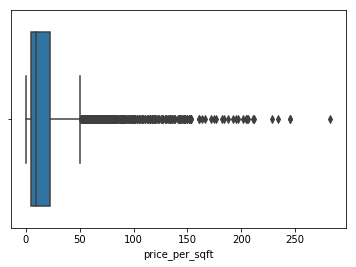

In [38]:
sns.boxplot(regression_df['price_per_sqft'])

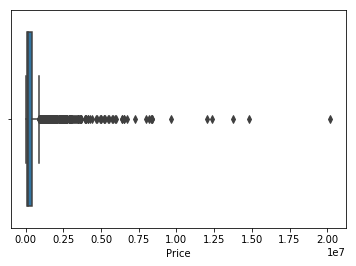

In [39]:
sns.boxplot(regression_df['Price'])

In [40]:
regression_df.describe()

Price        HtdSqFt        Acres  Actual Year Built  \
count  2.872000e+03    2872.000000  2872.000000        2872.000000   
mean   4.643444e+05    6160.049095     1.288503        1738.163997   
std    1.006634e+06   16259.920636     4.003858         636.408545   
min    2.067800e+04       0.000000     0.020000           0.000000   
25%    9.500000e+04    1221.000000     0.220000        1945.750000   
50%    1.805000e+05    2382.000000     0.530000        1973.000000   
75%    4.205750e+05    5082.000000     1.042500        1985.000000   
max    2.020000e+07  251465.000000    70.030000        2019.000000   

       Effective Year Built      Stories        Month         Year  \
count           2872.000000  2872.000000  2872.000000  2872.000000   
mean            1748.857939     1.057103     6.501741  1997.642061   
std              640.009286     0.658951     3.585935    11.799587   
min                0.000000     0.000000     1.000000  1970.000000   
25%             1970.000000     1.000000     3.000000  1988.000000   
50%             1981.000000     1.000000     6.500000  1997.000000   
75%             1988.000000     1.000000    10.000000  2006.000000   
max             2019.000000     5.000000    12.000000  2020.000000   

               Day  fed_int_rate     LATITUDE    LONGITUDE   Rent_index  \
count  2872.000000   2872.000000  2872.000000  2872.000000  2872.000000   
mean     12.483635      5.153517    29.664709   -82.350154   180.714275   
std      10.645211      4.018673     0.021337     0.031672    70.035914   
min       1.000000      0.060000    29.603577   -82.418578    47.100000   
25%       1.000000      1.807500    29.652322   -82.385704   126.300000   
50%      11.000000      5.170000    29.664484   -82.338567   167.800000   
75%      22.000000      7.040000    29.677217   -82.325453   230.000000   
max      31.000000     22.000000    29.734805   -82.260672   338.616000   

           lot_sqft  price_per_sqft  price_per_htdsqft  indv_pct_change  \
count  2.872000e+03     2872.000000        2872.000000      1725.000000   
mean   5.612719e+04       22.722476          90.789984       132.053665   
std    1.744080e+05       33.680664         173.091379       337.856446   
min    8.712000e+02        0.032828           0.000000       -77.723484   
25%    9.583200e+03        4.327314          25.029205         0.000000   
50%    2.308680e+04        9.565350          60.578284        31.506849   
75%    4.541130e+04       22.714508         105.042017       124.242424   
max    3.050507e+06      282.573207        4629.629630      4900.000000   

       days_btwn_sales  indv_change_per_day  idx_change_per_month  \
count      2872.000000          1725.000000           2590.000000   
mean       2023.292479             0.073170              0.084635   
std        2791.788341             0.253264              0.176457   
min           0.000000            -1.146853             -0.244024   
25%           0.000000             0.000000              0.011121   
50%         716.000000             0.013310              0.034954   
75%        3207.750000             0.050432              0.080122   
max       16266.000000             2.582395              1.657303   

       idx_change_per_year  idx_change_day  idx_sqft_month  idx_sqft_year  \
count          2780.000000     2146.000000     2872.000000    2872.000000   
mean              0.105362        0.090836       22.722476      22.722476   
std               0.130636        0.257236       18.862247      13.283579   
min               0.014159       -1.146853        0.135629       0.135629   
25%               0.051160        0.001984        8.388638      12.532770   
50%               0.068970        0.019380       16.528851      18.203201   
75%               0.103087        0.065770       32.317939      32.872525   
max               0.878616        2.536424      150.848797      56.939355   

       idx_sqft_day   30_idx_pct      idx_pct  transactions_per_day  \
count   2872.

In [41]:
regression_df = regression_df[regression_df['Stories'] < 3]

In [42]:
regression_df = regression_df[(regression_df['price_per_sqft'] < 150) & (regression_df['price_per_sqft'] > 1)]

In [43]:
regression_df = regression_df[regression_df['Price'] < 5000000]

In [44]:
regression_df.sort_values(by=['HtdSqFt'], ascending=False)

Date    Price Vac/Imp         Parcel                  NBHD_Desc  \
1211 1993-03-01  1105000      No  08162-011-000    TWP 9 RGE 20 INDUSTRIAL   
920  1989-07-01  1290500      No  08162-011-000    TWP 9 RGE 20 INDUSTRIAL   
710  1986-12-01  1850000      No  08162-011-000    TWP 9 RGE 20 INDUSTRIAL   
237  1981-09-01   300000      No  15485-000-000        SW 13TH STREET AREA   
3    1973-04-30  1000000      No  08306-002-000                 COMMERCIAL   
1138 1992-04-23  4255800      No  08244-001-014              SUPERFUND IMP   
1215 1993-03-30  1780000      No  07965-001-000               MEADOW CREST   
2444 2006-08-10  4000000      No  07965-001-000               MEADOW CREST   
1062 1991-05-23  1926000      No  07965-001-000               MEADOW CREST   
1244 1993-08-31   922600      No  09009-001-000     NW 13TH ST-8TH TO 23RD   
99   1979-01-01  1742000      No  09009-001-000     NW 13TH ST-8TH TO 23RD   
1651 1997-11-19   455000      No  06655-005-025  COM N&S E&W I-75 OAKSMALL   
1302 1994-03-16  1377500      No  06654-002-000  COM N&S E&W I-75 OAKSMALL   
651  1986-05-01  2440000      No  06809-001-000     BUTLER PLAZA/ARCHER RD   
143  1980-02-01  2303250      No  06809-001-000     BUTLER PLAZA/ARCHER RD   
422  1984-03-01  2314400      No  06809-001-000     BUTLER PLAZA/ARCHER RD   
2786 2012-06-04  3956100      No  10615-001-000                 COMMERCIAL   
1485 1996-04-09  3500000      No  10615-001-000                 COMMERCIAL   
1010 1990-08-15  2300000      No  14691-000-000   DWNTWN MAIN & UNIVERSITY   
2674 2016-12-12  4750000      No  14691-000-000   DWNTWN MAIN & UNIVERSITY   
2191 2004-03-17  1600000      No  06547-038-000                 COMMERCIAL   
2871 2013-12-30   941200      No  14986-000-000               PRIMARY COMM   
2246 2004-10-28   965000      No  14986-000-000               PRIMARY COMM   
2718 2010-12-23   700000      No  14986-000-000               PRIMARY COMM   
1297 1994-03-08  1485000      No  09003-002-000  OFF MAIN,8TH,16TH,23RD AV   
995  1990-07-01   691500      No  09003-002-000  OFF MAIN,8TH,16TH,23RD AV   
47   1977-01-01   388200      No  08210-003-001            GVILLE IND PARK   
2910 2014-10-01  1785000      No  06781-000-000     BUTLER PLAZA/ARCHER RD   
801  1988-01-01  1015000      No  06781-000-000     BUTLER PLAZA/ARCHER RD   
1278 1993-12-31   538500      No  06781-000-000     BUTLER PLAZA/ARCHER RD   
...         ...      ...     ...            ...                        ...   
2256 2004-12-01   395000     Vac  07915-008-003                    19 COMM   
588  1985-10-01   210000     Vac  06655-027-001                     OFFICE   
519  1985-01-01   240000     Vac  08231-055-002                 COMMERCIAL   
2852 2013-10-08  1500000     Vac  06655-002-026  COM N&S E&W I-75 OAKSMALL   
517  1985-01-01  1700000     Vac  06655-027-000                     OFFICE   
1285 1994-02-02    80000     Vac  06110-003-003         39TH AVE CONDO/PAD   
454  1984-07-01    70000     Vac  09989-004-000  OFF MAIN,8TH,16TH,23RD AV   
2166 2003-12-17  2282400     Vac  06655-027-000                     OFFICE   
461  1984-08-01  1119300     Vac  06655-202-000  COM N&S E&W I-75 OAKSMALL   
1319 1994-06-03    37500      No  12342-001-000      E UNIVERSITY/WALDO RD   
466  1984-08-01   398900     Vac  06810-001-008     BUTLER PLAZA/ARCHER RD   
1309 1994-04-28   410100     Vac  06061-001-001    39TH AVE & 43RD ST COMM   
2185 2004-02-19   420000     Vac  06340-022-004     N. FLA REG OFFICE AREA   
2889 2014-04-04  2254400     Vac  09971-001-001     NW 13TH ST-8TH TO 23RD   
2186 2004-02-26    30000     Vac  06544-010-000                 COMMERCIAL   
1305 1994-03-30   155000     Vac  07240-019-020        GARY GRANT 00-10-19   
1303 1994-03-25    21600     Vac  06072-020-004    39TH AVE & 43RD ST COMM   
478  1984-09-01   100000     Vac  06474-009-000                 COMMERCIAL   
1301 1994-03-11   250000     Vac  06801-003-004     BUTLER PLAZA/ARCHER RD   
481  1984-09-01    58500     Vac 

In [45]:
regression_df = regression_df[regression_df['HtdSqFt'] < 100000]

In [46]:
regression_df = regression_df[regression_df['Acres'] < 10]

In [55]:
regression_df.drop(columns = ['30_idx_pct', 'idx_pct'], inplace=True)

## Filtering my regressors

I need three sub dataframes to run my tests:
* the base regression data frame for which I will exclude the daily sqft index
* a filtered regression data frame for only days with more than one transaction
* a filtered regression dataframe with only office with more than one transaction
* a filtered regression dataframe with only office type excluding daily sqft index

In [56]:
office_df = regression_df[regression_df['Property_Cat'] == 'office']

In [57]:
filtered_regression_df = regression_df[regression_df['transactions_per_day'] > 1]

In [58]:
filtered_office_df = filtered_regression_df[filtered_regression_df['transactions_per_day'] > 1]

In [59]:
regression_df.columns

Index(['Date', 'Price', 'Vac/Imp', 'Parcel', 'NBHD_Desc', 'HtdSqFt', 'Acres',
       'Actual Year Built', 'Effective Year Built', 'Stories', 'Month', 'Year',
       'Day', 'fed_int_rate', 'LATITUDE', 'LONGITUDE', 'Month_Year',
       'Rent_index', 'lot_sqft', 'price_per_sqft', 'price_per_htdsqft',
       'Property_Cat', 'transactions_per_day', 'transactions_per_month',
       'Zoning', 'indv_pct_change', 'days_btwn_sales', 'indv_change_per_day',
       'idx_change_per_month', 'idx_change_per_year', 'idx_change_day',
       'idx_sqft_month', 'idx_sqft_year', 'idx_sqft_day'],
      dtype='object')

In [60]:
filtered_office_df = filtered_regression_df[filtered_regression_df['Property_Cat'] == 'office']

### Now to recalculate my other dependent index values with the new information

In [61]:
regression_df = regression_df.reset_index(drop=True)
office_df = office_df.reset_index(drop=True)
filtered_regression_df = filtered_regression_df.reset_index(drop=True)
filtered_office_df = filtered_office_df.reset_index(drop=True)

In [62]:
regression_df = utils.update_values(regression_df)
regression_df = utils.sqft_index(regression_df)

office_df = utils.update_values(office_df)
office_df = utils.sqft_index(office_df)

filtered_regression_df = utils.update_values(filtered_regression_df)
filtered_regression_df = utils.sqft_index(filtered_regression_df)

filtered_office_df = utils.update_values(filtered_office_df)
filtered_office_df = utils.sqft_index(filtered_office_df)

In [63]:
print(f'regression df shape is {regression_df.shape}')
print(f'office df shape is {office_df.shape}')
print(f'filtered regression df shape is {filtered_regression_df.shape}')
print(f'filtered office df shape is {filtered_office_df.shape}')

regression df shape is (2618, 34)
office df shape is (1156, 34)
filtered regression df shape is (1182, 34)
filtered office df shape is (490, 34)


In [64]:
regression_df = regression_df.sort_values(by=['Date', 'Parcel'])
regression_df['30_idx_pct'] = regression_df['idx_sqft_day'].pct_change(30)
regression_df['idx_pct'] = regression_df['idx_sqft_day'].pct_change()

office_df = office_df.sort_values(by=['Date', 'Parcel'])
office_df['30_idx_pct'] = office_df['idx_sqft_day'].pct_change(30)
office_df['idx_pct'] = office_df['idx_sqft_day'].pct_change()

filtered_regression_df = filtered_regression_df.sort_values(by=['Date', 'Parcel'])
filtered_regression_df['30_idx_pct'] = filtered_regression_df['idx_sqft_day'].pct_change(30)
filtered_regression_df['idx_pct'] = filtered_regression_df['idx_sqft_day'].pct_change()

filtered_office_df = filtered_office_df.sort_values(by=['Date', 'Parcel'])
filtered_office_df['30_idx_pct'] = filtered_office_df['idx_sqft_day'].pct_change(30)
filtered_office_df['idx_pct'] = filtered_office_df['idx_sqft_day'].pct_change()

regression_df scatter


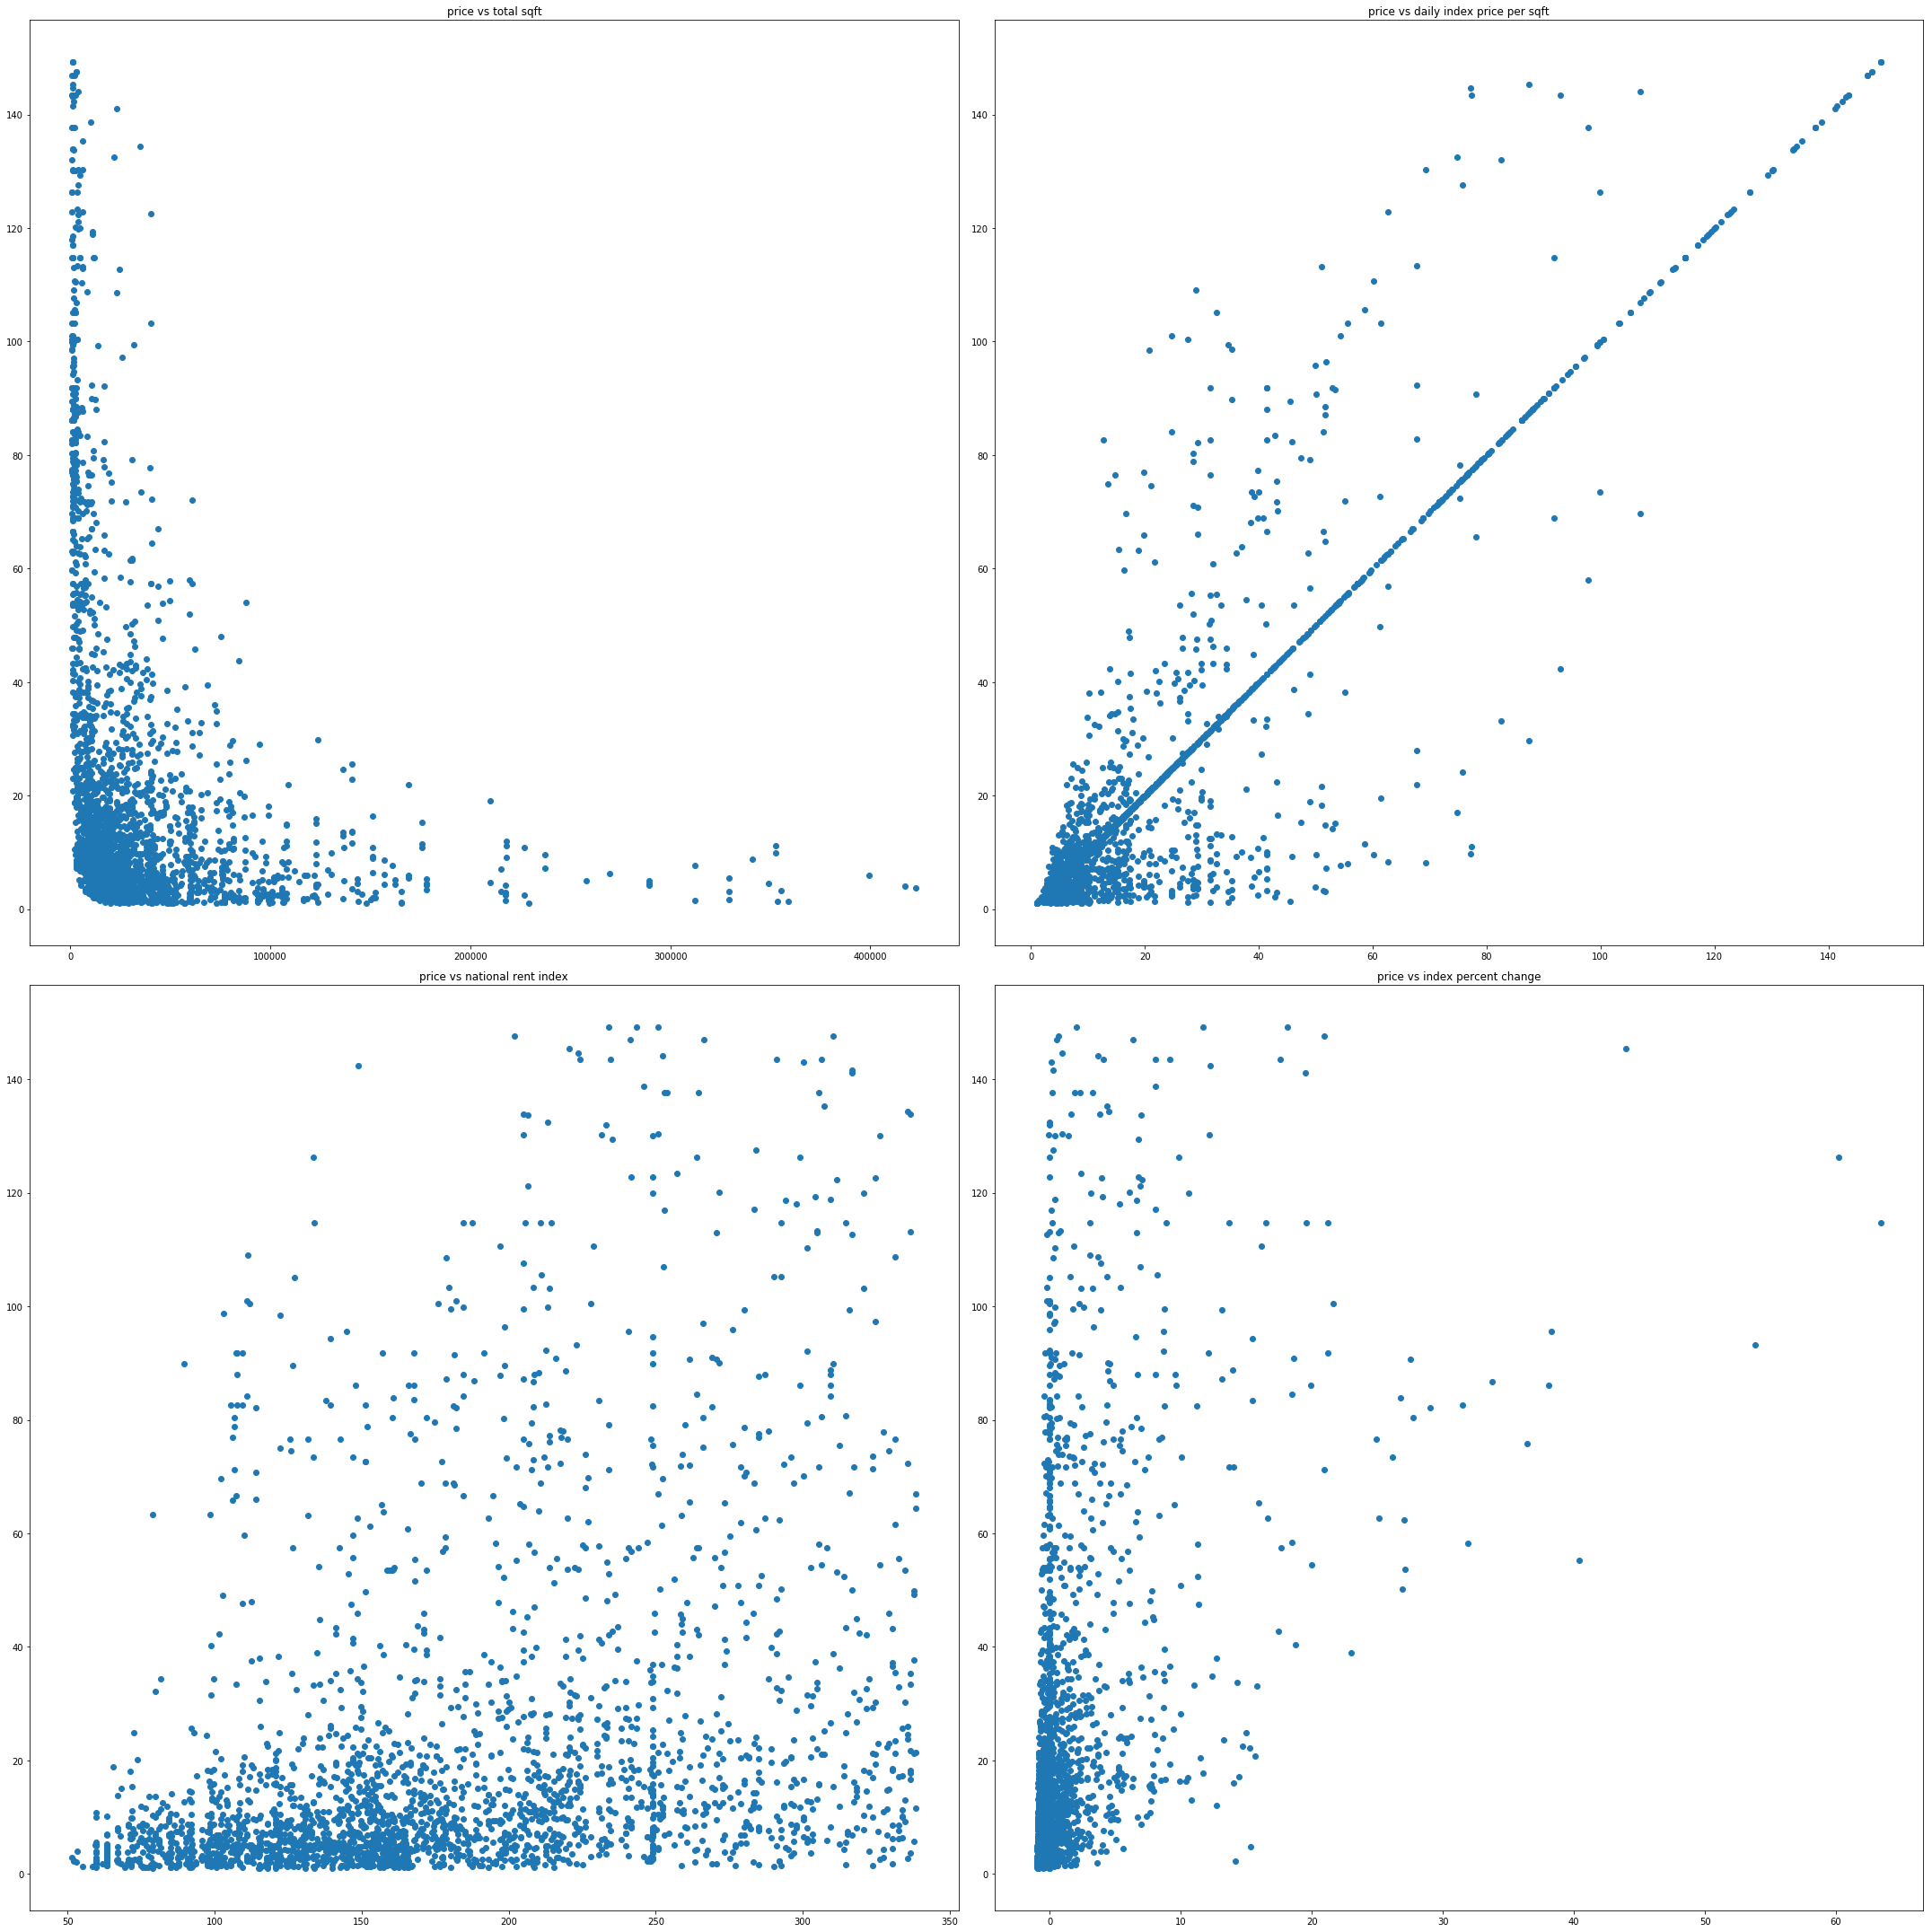

In [66]:
print('regression_df scatter')

fig, axes = plt.subplots(2, 2, sharey=False)

fig.set_size_inches(12, 6)


axes[0, 0].scatter(regression_df['lot_sqft'], regression_df['price_per_sqft'])
axes[0, 1].scatter(regression_df['idx_sqft_day'], regression_df["price_per_sqft"])
axes[1, 0].scatter(regression_df['Rent_index'], regression_df["price_per_sqft"])
axes[1, 1].scatter(regression_df['idx_pct'], regression_df["price_per_sqft"])

axes[0, 0].set_title('price vs total sqft')
axes[0, 1].set_title('price vs daily index price per sqft')
axes[1, 0].set_title('price vs national rent index')
axes[1, 1].set_title('price vs index percent change')


                         
fig.set_size_inches(30, 30)


fig.tight_layout()
plt.show()

office_df scatter


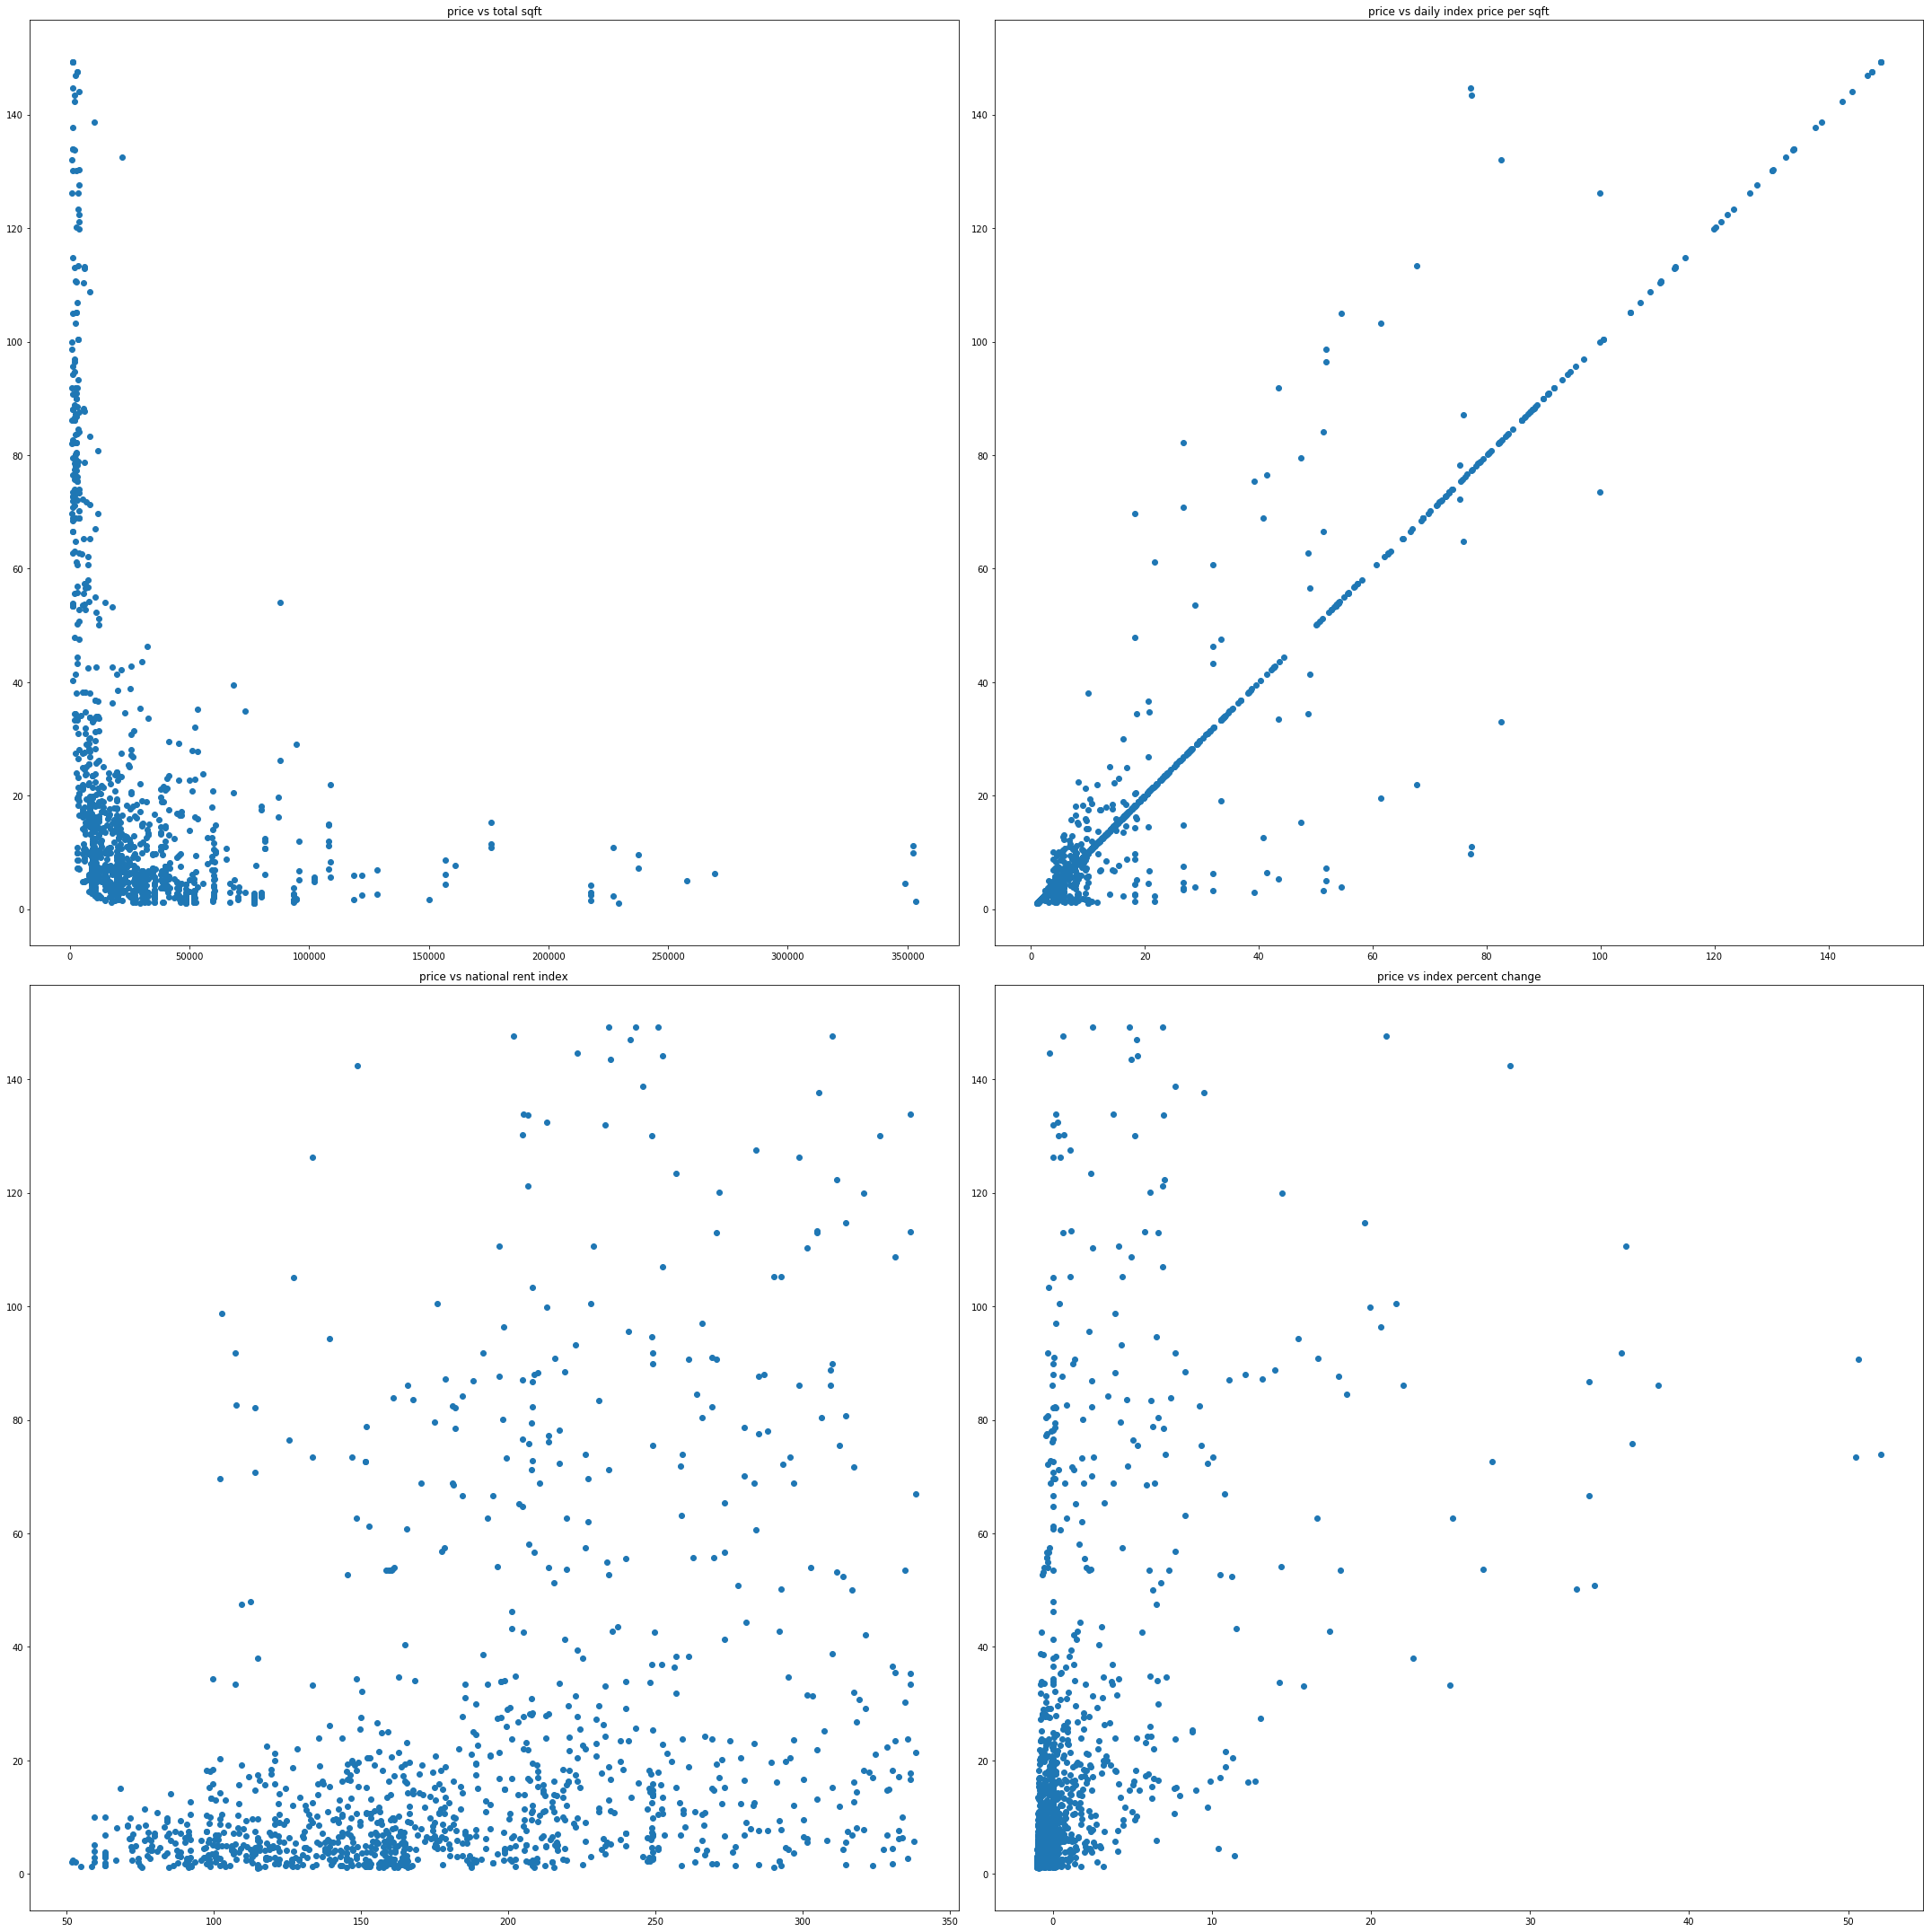

In [67]:
print('office_df scatter')

fig, axes = plt.subplots(2, 2, sharey=False)

fig.set_size_inches(12, 6)


axes[0, 0].scatter(office_df['lot_sqft'], office_df['price_per_sqft'])
axes[0, 1].scatter(office_df['idx_sqft_day'], office_df["price_per_sqft"])
axes[1, 0].scatter(office_df['Rent_index'], office_df["price_per_sqft"])
axes[1, 1].scatter(office_df['idx_pct'], office_df["price_per_sqft"])

axes[0, 0].set_title('price vs total sqft')
axes[0, 1].set_title('price vs daily index price per sqft')
axes[1, 0].set_title('price vs national rent index')
axes[1, 1].set_title('price vs index percent change')


                         
fig.set_size_inches(30, 30)


fig.tight_layout()
plt.show()

(17.5, -0.5)

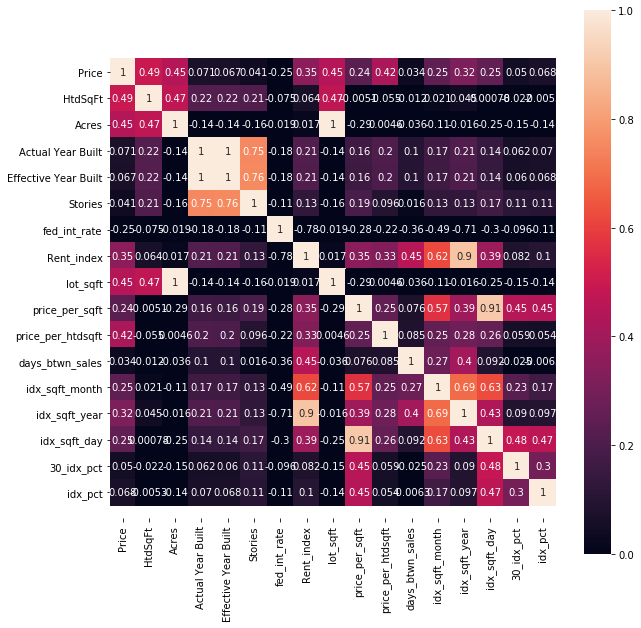

In [68]:
correlation_df = regression_df[['Price', 'Vac/Imp', 'HtdSqFt',
       'Acres', 'Actual Year Built', 'Effective Year Built', 'Stories', 'fed_int_rate', 
       'Rent_index', 'lot_sqft', 'price_per_sqft', 'price_per_htdsqft',
       'days_btwn_sales', 'idx_sqft_month', 'idx_sqft_year',
       'idx_sqft_day', '30_idx_pct', 'idx_pct', 'Zoning']]

relationships = correlation_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(relationships, vmin = 0, vmax = 1, square = True, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(17.5, -0.5)

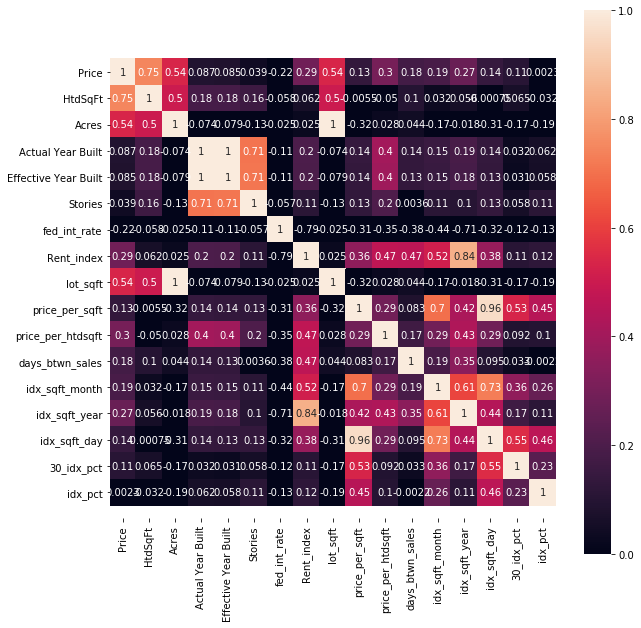

In [69]:
correlation_df = office_df[['Price', 'Vac/Imp', 'HtdSqFt',
       'Acres', 'Actual Year Built', 'Effective Year Built', 'Stories', 'fed_int_rate', 
       'Rent_index', 'lot_sqft', 'price_per_sqft', 'price_per_htdsqft',
       'days_btwn_sales', 'idx_sqft_month', 'idx_sqft_year',
       'idx_sqft_day', '30_idx_pct', 'idx_pct', 'Zoning']]

relationships = correlation_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(relationships, vmin = 0, vmax = 1, square = True, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [70]:
regression_df = regression_df.drop(columns = ['Parcel'])

office_df = office_df.drop(columns = ['Parcel'])

filtered_regression_df = filtered_regression_df.drop(columns = ['Parcel'])

filtered_office_df = filtered_office_df.drop(columns = ['Parcel'])

In [71]:
regression_df['days_btwn_sales'] = regression_df['days_btwn_sales'].fillna(0)

office_df['days_btwn_sales'] = office_df['days_btwn_sales'].fillna(0)

filtered_regression_df['days_btwn_sales'] = filtered_regression_df['days_btwn_sales'].fillna(0)

filtered_office_df['days_btwn_sales'] = filtered_office_df['days_btwn_sales'].fillna(0)

In [72]:
regression_df.drop(columns = ['indv_pct_change','idx_change_day', 'indv_change_per_day', 'idx_change_per_month', 'idx_change_per_year', 'Month_Year'], inplace=True)

office_df.drop(columns = ['indv_pct_change','idx_change_day', 'indv_change_per_day', 'idx_change_per_month', 'idx_change_per_year', 'Month_Year'], inplace=True)

filtered_regression_df.drop(columns = ['indv_pct_change','idx_change_day', 'indv_change_per_day', 'idx_change_per_month', 'idx_change_per_year', 'Month_Year'], inplace=True)

filtered_office_df.drop(columns = ['indv_pct_change','idx_change_day', 'indv_change_per_day', 'idx_change_per_month', 'idx_change_per_year', 'Month_Year'], inplace=True)

In [73]:
regression_df.dropna(inplace=True)

office_df.dropna(inplace=True)

filtered_regression_df.dropna(inplace=True)

filtered_office_df.dropna(inplace=True)

In [74]:
regression_dummified = pd.get_dummies(regression_df, drop_first=True)

office_dummified = pd.get_dummies(office_df, drop_first=True)

filtered_r_dummified = pd.get_dummies(filtered_regression_df, drop_first=True)

filtered_o_dummified = pd.get_dummies(filtered_office_df, drop_first=True)

### Regression_df unfiltered

In [75]:
x = regression_dummified.drop(columns = ['Date', 'Price', 'price_per_sqft', 'price_per_htdsqft', 'Day'])
y = regression_dummified['price_per_sqft']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

In [76]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()

print(results.summary())

S:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     85.19
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:26:39   Log-Likelihood:                -7811.4
No. Observations:                2070   AIC:                         1.583e+04
Df Residuals:                    1966   BIC:                         1.642e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

S:\Anaconda\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning:

invalid value encountered in true_divide

S:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning:

invalid value encountered in greater

S:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning:

invalid value encountered in less

S:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning:

invalid value encountered in less_equal



In [77]:
x = regression_dummified.drop(columns = ['Date', 'Price', 'price_per_sqft', 'price_per_htdsqft', 'Day', 'idx_sqft_day'])
y = regression_dummified['price_per_sqft']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

lrm = LinearRegression()
lrm.fit(X_train, y_train)


# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.6650833470838895
-----Test set statistics-----
R-squared of the model in the test set is: 0.5737875312917262
Mean absolute error of the prediction is: 19.127866150008384
Mean squared error of the prediction is: 585.4847862948567
Root mean squared error of the prediction is: 24.19679289275454
Mean absolute percentage error of the prediction is: 150.27668043926002


In [78]:
from sklearn.linear_model import Lasso


x = regression_dummified.drop(columns = ['Date', 'Price', 'price_per_sqft', 'price_per_htdsqft', 'Day', 'idx_sqft_day'])
y = regression_dummified['price_per_sqft']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

lassoregr = Lasso(alpha= 100) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

train_score= lassoregr.score(X_train, y_train)
test_score= lassoregr.score(X_test, y_test)
coeff_used = np.sum(lassoregr.coef_!=0)

print ("training score: {}".format(train_score)) 
print ("test score: {}".format(test_score))
print ("number of features used: {} ".format(coeff_used))
print('-------------------------------------------------')

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

training score: 0.21972461047981373
test score: 0.1685596061831457
number of features used: 6 
-------------------------------------------------
R-squared of the model on the training set is: 0.21972461047981373
-----Test set statistics-----
R-squared of the model on the test set is: 0.1685596061831457
Mean absolute error of the prediction is: 25.003243660736658
Mean squared error of the prediction is: 1142.1432666343826
Root mean squared error of the prediction is: 33.79561016810294
Mean absolute percentage error of the prediction is: 164.39390131938424


In [79]:
x = regression_dummified.drop(columns = ['Date', 'Price', 'price_per_sqft', 'price_per_htdsqft', 'Day'])
y = regression_dummified['price_per_sqft']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

model = AdaBoostRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

y_preds_test = model.predict(X_test)

print('R-Squared:', r2_score(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-Squared: 0.7991792292693414
Mean Absolute Error: 12.674796813667829
Root Mean Squared Error: 16.609212695663203
Mean absolute percentage error of the prediction is: 115.48434759604594


In [85]:
x = regression_dummified.drop(columns = ['Date', 'Price', 'price_per_sqft', 'price_per_htdsqft', 'Day', 'idx_sqft_day'])
y = regression_dummified['price_per_sqft']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

model = RandomForestRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
y_preds_test = model.predict(X_test)

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print('R-Squared:', r2_score(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

S:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Mean absolute error of the prediction is: 13.62977225967131
Mean squared error of the prediction is: 390.0843073239745
R-Squared: 0.7160322530649355
Mean Absolute Error: 13.62977225967131
Root Mean Squared Error: 19.750552076435092
Mean absolute percentage error of the prediction is: 66.75438955262179


In [86]:
model.score(X_test, y_test)

0.7160322530649355

In [87]:
model.score(X_train, y_train)

0.9610979428531355

In [88]:
sorted(zip(model.feature_importances_, x.columns))

[(0.0, 'NBHD_Desc_MULTI-FAMILY'),
 (0.0, 'NBHD_Desc_NW INDUSTRIAL 16TH ST'),
 (0.0, 'NBHD_Desc_OLD UNION STREET-FIRST FL'),
 (0.0, 'NBHD_Desc_PORTERS AREA SW'),
 (0.0, 'NBHD_Desc_SE DOWNTOWN COMMERCIAL'),
 (0.0, 'NBHD_Desc_SEC 1-36 OF 9-19'),
 (0.0, 'NBHD_Desc_SUPERFUND IMP'),
 (0.0, 'Zoning_BUS'),
 (0.0, 'Zoning_CP'),
 (0.0, 'Zoning_DT'),
 (0.0, 'Zoning_I1'),
 (0.0, 'Zoning_I2'),
 (0.0, 'Zoning_MD'),
 (0.0, 'Zoning_MU1'),
 (0.0, 'Zoning_MU2'),
 (0.0, 'Zoning_OF'),
 (0.0, 'Zoning_OFF/R48'),
 (0.0, 'Zoning_PD'),
 (0.0, 'Zoning_RC'),
 (0.0, 'Zoning_RMF7'),
 (0.0, 'Zoning_RSF4'),
 (0.0, 'Zoning_U4'),
 (0.0, 'Zoning_U5'),
 (0.0, 'Zoning_U6'),
 (0.0, 'Zoning_U7'),
 (0.0, 'Zoning_U8'),
 (0.0, 'Zoning_U9'),
 (8.710920329870767e-10, 'NBHD_Desc_OAK HILL S'),
 (1.1926668898284537e-08, 'Zoning_COMM'),
 (1.982645427816365e-08, 'Zoning_PF'),
 (5.911257034511169e-08, 'NBHD_Desc_GATEWAY/INGLESIDE/HOOPERS'),
 (1.205625844259113e-07, 'NBHD_Desc_NW INDUSTRIAL CONDO'),
 (1.387896537120768e-07, 'NBHD_Desc

Random forest is the best for the base set, so I'll use it for the other dummy sets as well

### Unfiltered office_df

In [89]:
x = office_dummified.drop(columns = ['Date', 'Price', 'price_per_sqft', 'price_per_htdsqft', 'Day', 'idx_sqft_day'])
y = office_dummified['price_per_sqft']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

model = RandomForestRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
y_preds_test = model.predict(X_test)

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print('R-Squared:', r2_score(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Mean absolute error of the prediction is: 12.777184320604526
Mean squared error of the prediction is: 432.99323294952706
R-Squared: 0.7098168604329314
Mean Absolute Error: 12.777184320604526
Root Mean Squared Error: 20.808489444203467
Mean absolute percentage error of the prediction is: 47.4070029684254


S:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [90]:
model.score(X_test, y_test)

0.7098168604329314

In [91]:
model.score(X_train, y_train)

0.966189693355979

In [92]:
sorted(zip(model.feature_importances_, x.columns))

[(0.0, 'NBHD_Desc_NW 53RD AVE AND 43RD ST'),
 (0.0, 'NBHD_Desc_NW DOWNTOWN COMMERCIAL'),
 (0.0, 'NBHD_Desc_NW INDUSTRIAL 16TH ST'),
 (0.0, 'NBHD_Desc_OFF E. UNIVERSITY COMM'),
 (0.0, 'NBHD_Desc_PRIMARY COMM'),
 (0.0, 'Zoning_BUS'),
 (0.0, 'Zoning_CON'),
 (0.0, 'Zoning_CP'),
 (0.0, 'Zoning_DT'),
 (0.0, 'Zoning_I1'),
 (0.0, 'Zoning_I2'),
 (0.0, 'Zoning_MD'),
 (0.0, 'Zoning_MU1'),
 (0.0, 'Zoning_MU2'),
 (0.0, 'Zoning_OF'),
 (0.0, 'Zoning_OFF/R48'),
 (0.0, 'Zoning_PD'),
 (0.0, 'Zoning_RMF7'),
 (0.0, 'Zoning_U4'),
 (0.0, 'Zoning_U6'),
 (0.0, 'Zoning_U8'),
 (0.0, 'Zoning_U9'),
 (8.781995947909995e-10, 'NBHD_Desc_SE DOWNTOWN COMMERCIAL'),
 (1.2604454130258386e-09, 'NBHD_Desc_COMMERCIAL STORES'),
 (4.870832399481284e-09, 'Zoning_PF'),
 (9.598711449380141e-09, 'NBHD_Desc_GARY GRANT 00-10-19'),
 (1.3777667748665219e-08, 'NBHD_Desc_THORNEBROOK VILLAGE'),
 (5.1180151665760655e-08, 'Zoning_BI'),
 (5.407379309478938e-08, 'Zoning_COMM'),
 (6.907218628615179e-08, 'NBHD_Desc_GATEWAY/INGLESIDE/HOOPERS')

### Filtered regression_df

Includes the daily index since this dataframe is filtered for more than one transaction a day - which would avoid those single sale days that skew the output

In [93]:
x = filtered_r_dummified.drop(columns = ['Date', 'Price', 'price_per_sqft', 'price_per_htdsqft', 'Day'])
y = filtered_r_dummified['price_per_sqft']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

model = RandomForestRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
y_preds_test = model.predict(X_test)

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print('R-Squared:', r2_score(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Mean absolute error of the prediction is: 13.977085780437426
Mean squared error of the prediction is: 571.183672577557
R-Squared: 0.5354356978978253
Mean Absolute Error: 13.977085780437426
Root Mean Squared Error: 23.899449210757076
Mean absolute percentage error of the prediction is: 45.5485421548106


S:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [94]:
model.score(X_test, y_test)

0.5354356978978253

In [95]:
model.score(X_train, y_train)

0.95216781512299

In [96]:
sorted(zip(model.feature_importances_, x.columns))

[(0.0, 'NBHD_Desc_COMMERCIAL 6-10-20'),
 (0.0, 'NBHD_Desc_COMMERCIAL 9-10-20'),
 (0.0, 'NBHD_Desc_DWNTWN OFFICE CONDOS'),
 (0.0, 'NBHD_Desc_FLA PARK'),
 (0.0, 'NBHD_Desc_GARY GRANT 00-10-19'),
 (0.0, 'NBHD_Desc_GATEWAY/INGLESIDE/HOOPERS'),
 (0.0, 'NBHD_Desc_INDUSTRIAL SW'),
 (0.0, 'NBHD_Desc_MULTI-FAMILY'),
 (0.0, 'NBHD_Desc_NORTHWOOD COMMERCIAL'),
 (0.0, 'NBHD_Desc_NW INDUSTRIAL CONDO'),
 (0.0, 'NBHD_Desc_OAK HILL S'),
 (0.0, 'NBHD_Desc_OLD UNION STREET-FIRST FL'),
 (0.0, 'NBHD_Desc_PORTERS AREA SW'),
 (0.0, 'NBHD_Desc_SE DOWNTOWN COMMERCIAL'),
 (0.0, 'Zoning_BUS'),
 (0.0, 'Zoning_CON'),
 (0.0, 'Zoning_DT'),
 (0.0, 'Zoning_I1'),
 (0.0, 'Zoning_MU1'),
 (0.0, 'Zoning_MU2'),
 (0.0, 'Zoning_OF'),
 (0.0, 'Zoning_PD'),
 (0.0, 'Zoning_PF'),
 (0.0, 'Zoning_RM'),
 (0.0, 'Zoning_U4'),
 (0.0, 'Zoning_U6'),
 (0.0, 'Zoning_U7'),
 (0.0, 'Zoning_U8'),
 (0.0, 'Zoning_U9'),
 (1.503469751034693e-08, 'NBHD_Desc_HUB MF<10 UNITS SUB3'),
 (1.6175486679076045e-08, 'NBHD_Desc_GVILLE IND PARK'),
 (2.647341523

### Filtered office_df

Includes the daily index since this dataframe is filtered for more than one transaction a day - which would avoid those single sale days that skew the output

In [152]:
x = filtered_o_dummified.drop(columns = ['Date', 'Price', 'price_per_sqft', 'price_per_htdsqft', 'Day'])
y = filtered_o_dummified['price_per_sqft']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

model = RandomForestRegressor()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
y_preds_test = model.predict(X_test)

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print('R-Squared:', r2_score(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Mean absolute error of the prediction is: 10.46233514118631
Mean squared error of the prediction is: 413.6189097622217
R-Squared: 0.7319946879035357
Mean Absolute Error: 10.46233514118631
Root Mean Squared Error: 20.33762301160639
Mean absolute percentage error of the prediction is: 34.06868632941949


S:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [120]:
model.score(X_test, y_test)

0.7214657783799712

In [121]:
model.score(X_train, y_train)

0.9731035351560372

In [112]:
sorted(zip(model.feature_importances_, x.columns))

[(0.0, 'NBHD_Desc_8TH AVENUE INDUSTRIAL'),
 (0.0, 'NBHD_Desc_FLA PARK'),
 (0.0, 'NBHD_Desc_GVILLE IND PARK'),
 (0.0, 'NBHD_Desc_INDUSTRIAL'),
 (0.0, 'NBHD_Desc_N. MAIN STREET'),
 (0.0, 'NBHD_Desc_NEWBERRY CREST'),
 (0.0, 'NBHD_Desc_NORTHWOOD COMMERCIAL'),
 (0.0, 'NBHD_Desc_NW 53RD AVE AND 43RD ST'),
 (0.0, 'NBHD_Desc_NW DOWNTOWN COMMERCIAL'),
 (0.0, 'NBHD_Desc_SE DOWNTOWN COMMERCIAL'),
 (0.0, 'NBHD_Desc_THIRD COMMERCIAL'),
 (0.0, 'Zoning_BUS'),
 (0.0, 'Zoning_DT'),
 (0.0, 'Zoning_MU2'),
 (0.0, 'Zoning_OF'),
 (0.0, 'Zoning_PD'),
 (0.0, 'Zoning_PF'),
 (0.0, 'Zoning_RH'),
 (0.0, 'Zoning_U4'),
 (0.0, 'Zoning_U6'),
 (0.0, 'Zoning_U8'),
 (0.0, 'Zoning_UMUH'),
 (4.2195452846861745e-12, 'NBHD_Desc_COMMERCIAL STORES'),
 (2.242301930611531e-08, 'NBHD_Desc_NW INDUSTRIAL'),
 (8.153487163526266e-08, 'NBHD_Desc_GATEWAY/INGLESIDE/HOOPERS'),
 (1.056245091216406e-07, 'NBHD_Desc_PRIMARY COMM'),
 (1.4179886624288175e-07, 'NBHD_Desc_SW 13TH STREET AREA'),
 (1.791628531361432e-07, 'NBHD_Desc_SE INDUSTRIAL'

In [113]:
regression_dummified.to_csv('dummified_commercial.csv', index=False)